# <a href="https://mipt-stats.gitlab.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Задание 7

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`.
* Дедлайн **24 апреля в 23:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb` и все фотографии, если пишете теоретическую часть от руки.
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.

-----

*Замечания.* Теоретические решения можно оформить
* в $\LaTeX$-формате в ноутбуке;
* написать от руки и прикрепить к ноутбуку;
* написать от руки и выслать боту.  

Во втором случае также **важно** "вшить" фото в ноутбук. Сделать это можно с помощью Edit -> Insert Image в Jupyter или с помощью кнопки "Вставить изображение" в Colab. Следите за размером итогового файла.

Фотографии принимаются только в хорошем качестве, **следите за освещением и почерком**. На фотографиях также указывайте номера задач.

-----

**Работа Закировой Марфы, Б06-907**

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##Задача 1 

(6 баллов)

Проводится испытание нового учебника по математике. Для исследований были отобраны 2500 школьников. Некоторые из них учились по новому учебнику, а другие — по старому. Измеряется количество школьников, сдавших пробный ЕГЭ на 4 и 5. В первой группе экзамен хорошо сдали 853  из 1719 школьников, учившихся по новому учебнику. Во второй группе значимое улучшение наблюдается среди  хорошо сдали 369  из 781 школьников, учившихся по старому. Влияет ли новый
учебник на результаты школьников?

*Основной поток* (+4 балла): Посчитайте коэффициенты ассоциации, контингенции и коэффициент корреляции Крамера. Сделайте выводы.

*Задачу можно писать на листочке. Все совпадения с реальными лицами и ситуациями случайны:)*

**см пдф**

In [2]:
np.round(sps.chi2(df=1).ppf(0.95),2)

3.84

---

## Задача 2

Рассмотрим последовательность чисел

    1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17 


*Базовый поток* (4 балла): Посчитайте коэффициенты корреляции Пирсона, Спирмена и Кендалла для этой последовательности и последовательности 

    1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Сделайте выводы.

*Основной поток* (8 баллов): Можно ли на уровне значимости 0.05 считать, что эта последовательность чисел 
является реализацией случайного вектора, все 10 компонент которого независимые одинаково распределенные случайные величины? Вывод сделайте на основе коэффициентов корреляции. Придумайте алгоритм проверки самостоятельно.

---

**Для того чтобы пользоваться критерием Пирсона, сначала проверим выборки на нормальность методом Шапиро-Уилка**

In [8]:
x = np.array([1.05, 1.12, 1.37, 1.50, 1.51, 1.73, 1.85, 1.98, 2.03, 2.17])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
p_vals = multipletests([sps.shapiro(x)[1],sps.shapiro(y)[1]], method = 'holm')[1]
print(f'p-value для X: {np.round(p_vals[0],3)}')  #МПГ
print(f'p-value для Y: {np.round(p_vals[1],3)}')


p-value для X: 1.0
p-value для Y: 1.0


**Оба значения p-value > 0.05 => коэффициентом Пирсона пользоваться можно, противоречия с нормальным распределением нет.**

In [13]:
res = pd.DataFrame({'Коэффициент Пирсона': np.round([sps.pearsonr(x, y)[0], sps.pearsonr(x, y)[1]],3),'Cпирмена': np.round([sps.spearmanr(x,y)[0], sps.spearmanr(x,y)[1]],3), 'Кендалла': np.round([sps.kendalltau(x, y)[0], sps.kendalltau(x, y)[1]],3)})
newline = {}
p_vals = multipletests([sps.pearsonr(x, y)[1], sps.spearmanr(x,y)[1], sps.kendalltau(x, y)[1]], method = 'holm')[1]
for i,key in enumerate(res.columns):
  newline[key] =  np.round(p_vals[i],3)
res = res.append(newline, ignore_index=True)
res.index = ['correlation', 'p-value', 'p-val_corr']
res

Коэффициент Пирсона  Cпирмена  Кендалла
correlation                0.992       1.0       1.0
p-value                    0.000       0.0       0.0
p-val_corr                 0.000       0.0       0.0

**Видим, что для всех  коэффицентов гипотеза о независимости последовательностей X и Y отвергается. Получаем что точки лежат на монотонной кривой. Причем, так как коэффциент Пирсона очень близок к единице, то эта монотонная кривая близка к прямой.**

**Если у случайного вектора, все 10 компонент независимые одинаково распределенные случайные величины, то любые его непересекающиеся срезы будут независимыми выборками. Рассмотрим первые 2 среза выборок, постепенно увеличивая их длину. Будем пользоваться всеми тремя коэффиицентами корреляции и сделаем МПГ.**

In [71]:
res = {'Длина среза': [2,3,5],'Пирсон коэфф': [], 'Пирсон p-v': [],'Спирмен коэфф': [], 'Спирмен p-v': [], 'Кендалл коэфф': [], 'Кендалл p-v': [], 'p-val_cor':[]}

for size in res['Длина среза']:
  print(x[:size], x[size:2*size])
  res['Пирсон коэфф'], res['Пирсон p-v'] = sps.pearsonr(x[:size], x[size:2*size])
  res['Спирмен коэфф'], res['Спирмен p-v'] = sps.spearmanr(x[:size], x[size:2*size])
  res['Кендалл коэфф'], res['Кендалл p-v'] = sps.spearmanr(x[:size], x[size:2*size])
  res['p-val_cor'] = multipletests([res['Пирсон p-v'], res['Спирмен p-v'], res['Кендалл p-v']], method = 'holm')[1]

pd.DataFrame(res)

[1.05 1.12] [1.37 1.5 ]
[1.05 1.12 1.37] [1.5  1.51 1.73]
[1.05 1.12 1.37 1.5  1.51] [1.73 1.85 1.98 2.03 2.17]


Длина среза  Пирсон коэфф  Пирсон p-v  Спирмен коэфф   Спирмен p-v  \
0            2      0.948527     0.01391            1.0  1.404265e-24   
1            3      0.948527     0.01391            1.0  1.404265e-24   
2            5      0.948527     0.01391            1.0  1.404265e-24   

   Кендалл коэфф   Кендалл p-v  p-val_cor  
0            1.0  1.404265e-24    0.01391  
1            1.0  1.404265e-24    0.00000  
2            1.0  1.404265e-24    0.00000

**То есть и для подвекторов длины 2 и более гипотезу о независимости надо отвергнуть, следовательно и все 10 компонент выборки независимыми не являются. Об этом же говорят и коэффициенты корреляции близкие\равные 1.**

## Задача 3: Белые мыши наносят ответный удар

(14 баллов)

Скачаем [данные](https://www.kaggle.com/ruslankl/mice-protein-expression) об экспрессии генов различных белков в головном мозге белых мышей.

В этом датасете представлены уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых страдают синдромом Дауна, а некоторые были подвержены контекстному обусловливанию страха, задачи, используемой для оценки ассоциативного обучения.

Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки, то есть каждой мыши соответствует несколько записей в таблице.

Загрузим данные и посмотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [15]:
data = pd.read_csv("./Data_Cortex_Nuclear.csv")
data.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

Чтобы вспомнить, что это за данные, для начала выведем простые описательные статистики по вещественным параметрам.

In [ ]:
data.describe()

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Количество записей каждого класса:

In [ ]:
data['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

Количество записей по генотипам:

In [ ]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

В начале исследования полезно посмотреть на данные визуально. Посмотрим на зависимость уровней экспрессии разных белков друг от друга. Визуализируйте данные в первых десяти колонках в двумерных проекциях, используя `sns.pairplot`. 

In [16]:
fav_columns = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N']

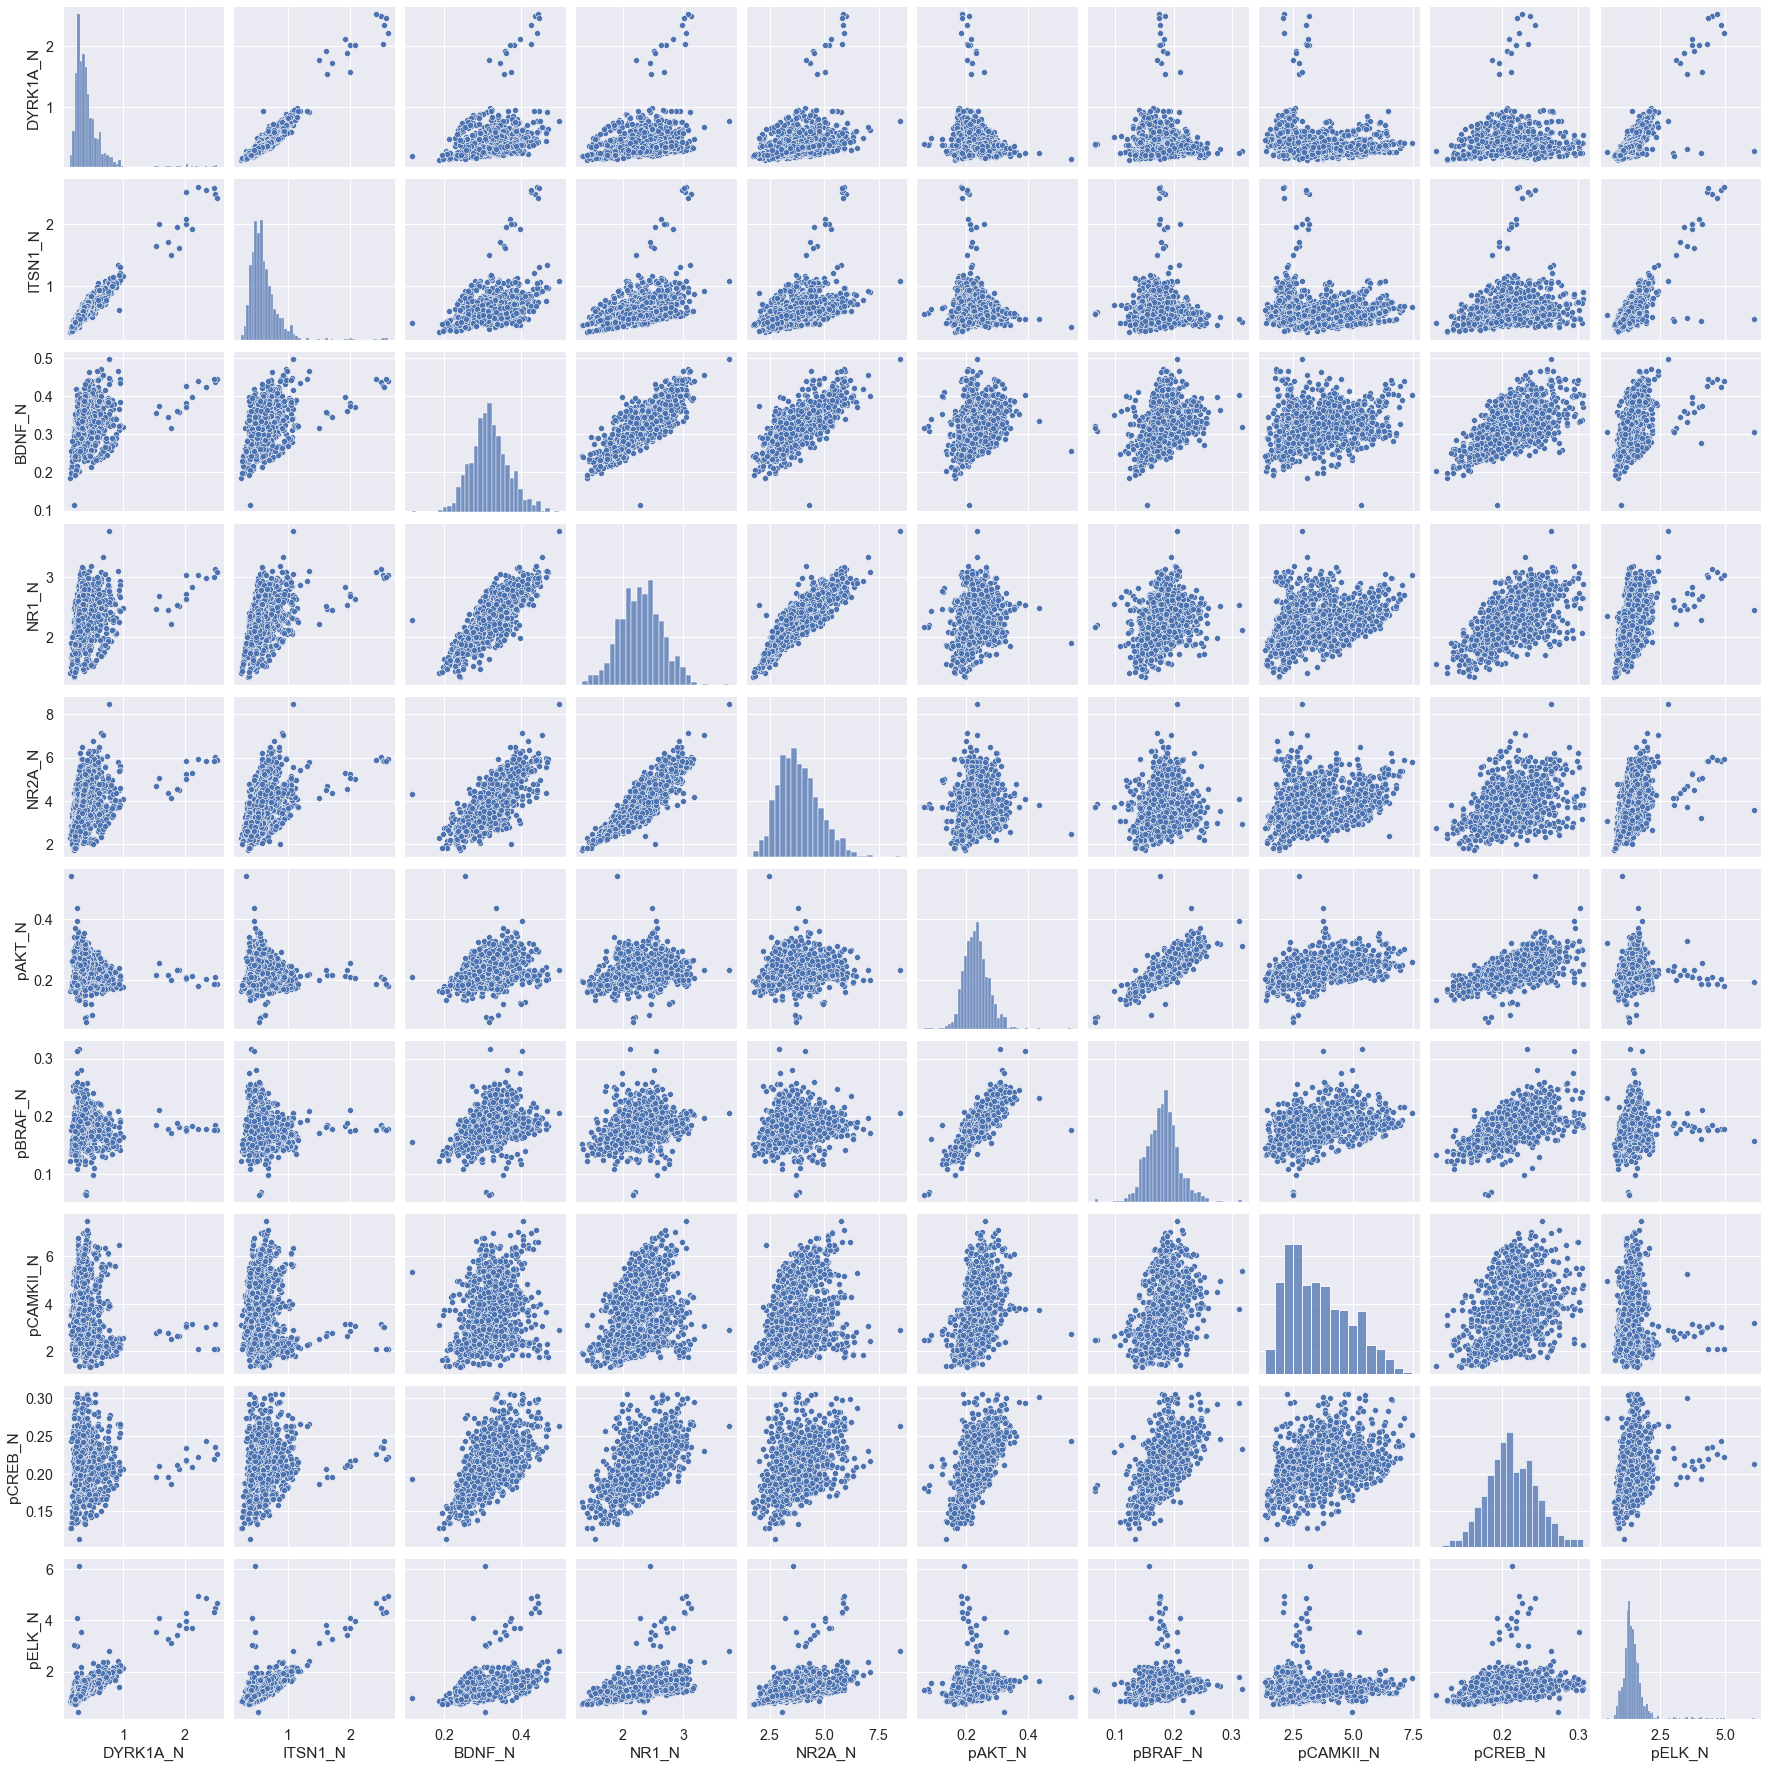

In [ ]:
sns.pairplot(data[fav_columns[:10]])

**Для некоторых пар признаков характерны линейные тренды. По гистограммам можно видеть что признаки имеют очень разные распределения, те которые похоже что скоррелированы имеют похожие гистограммы => видимо и функции распределения**

При визуализации в двумерных проекциях можно также строить ядерные оценки плотности:

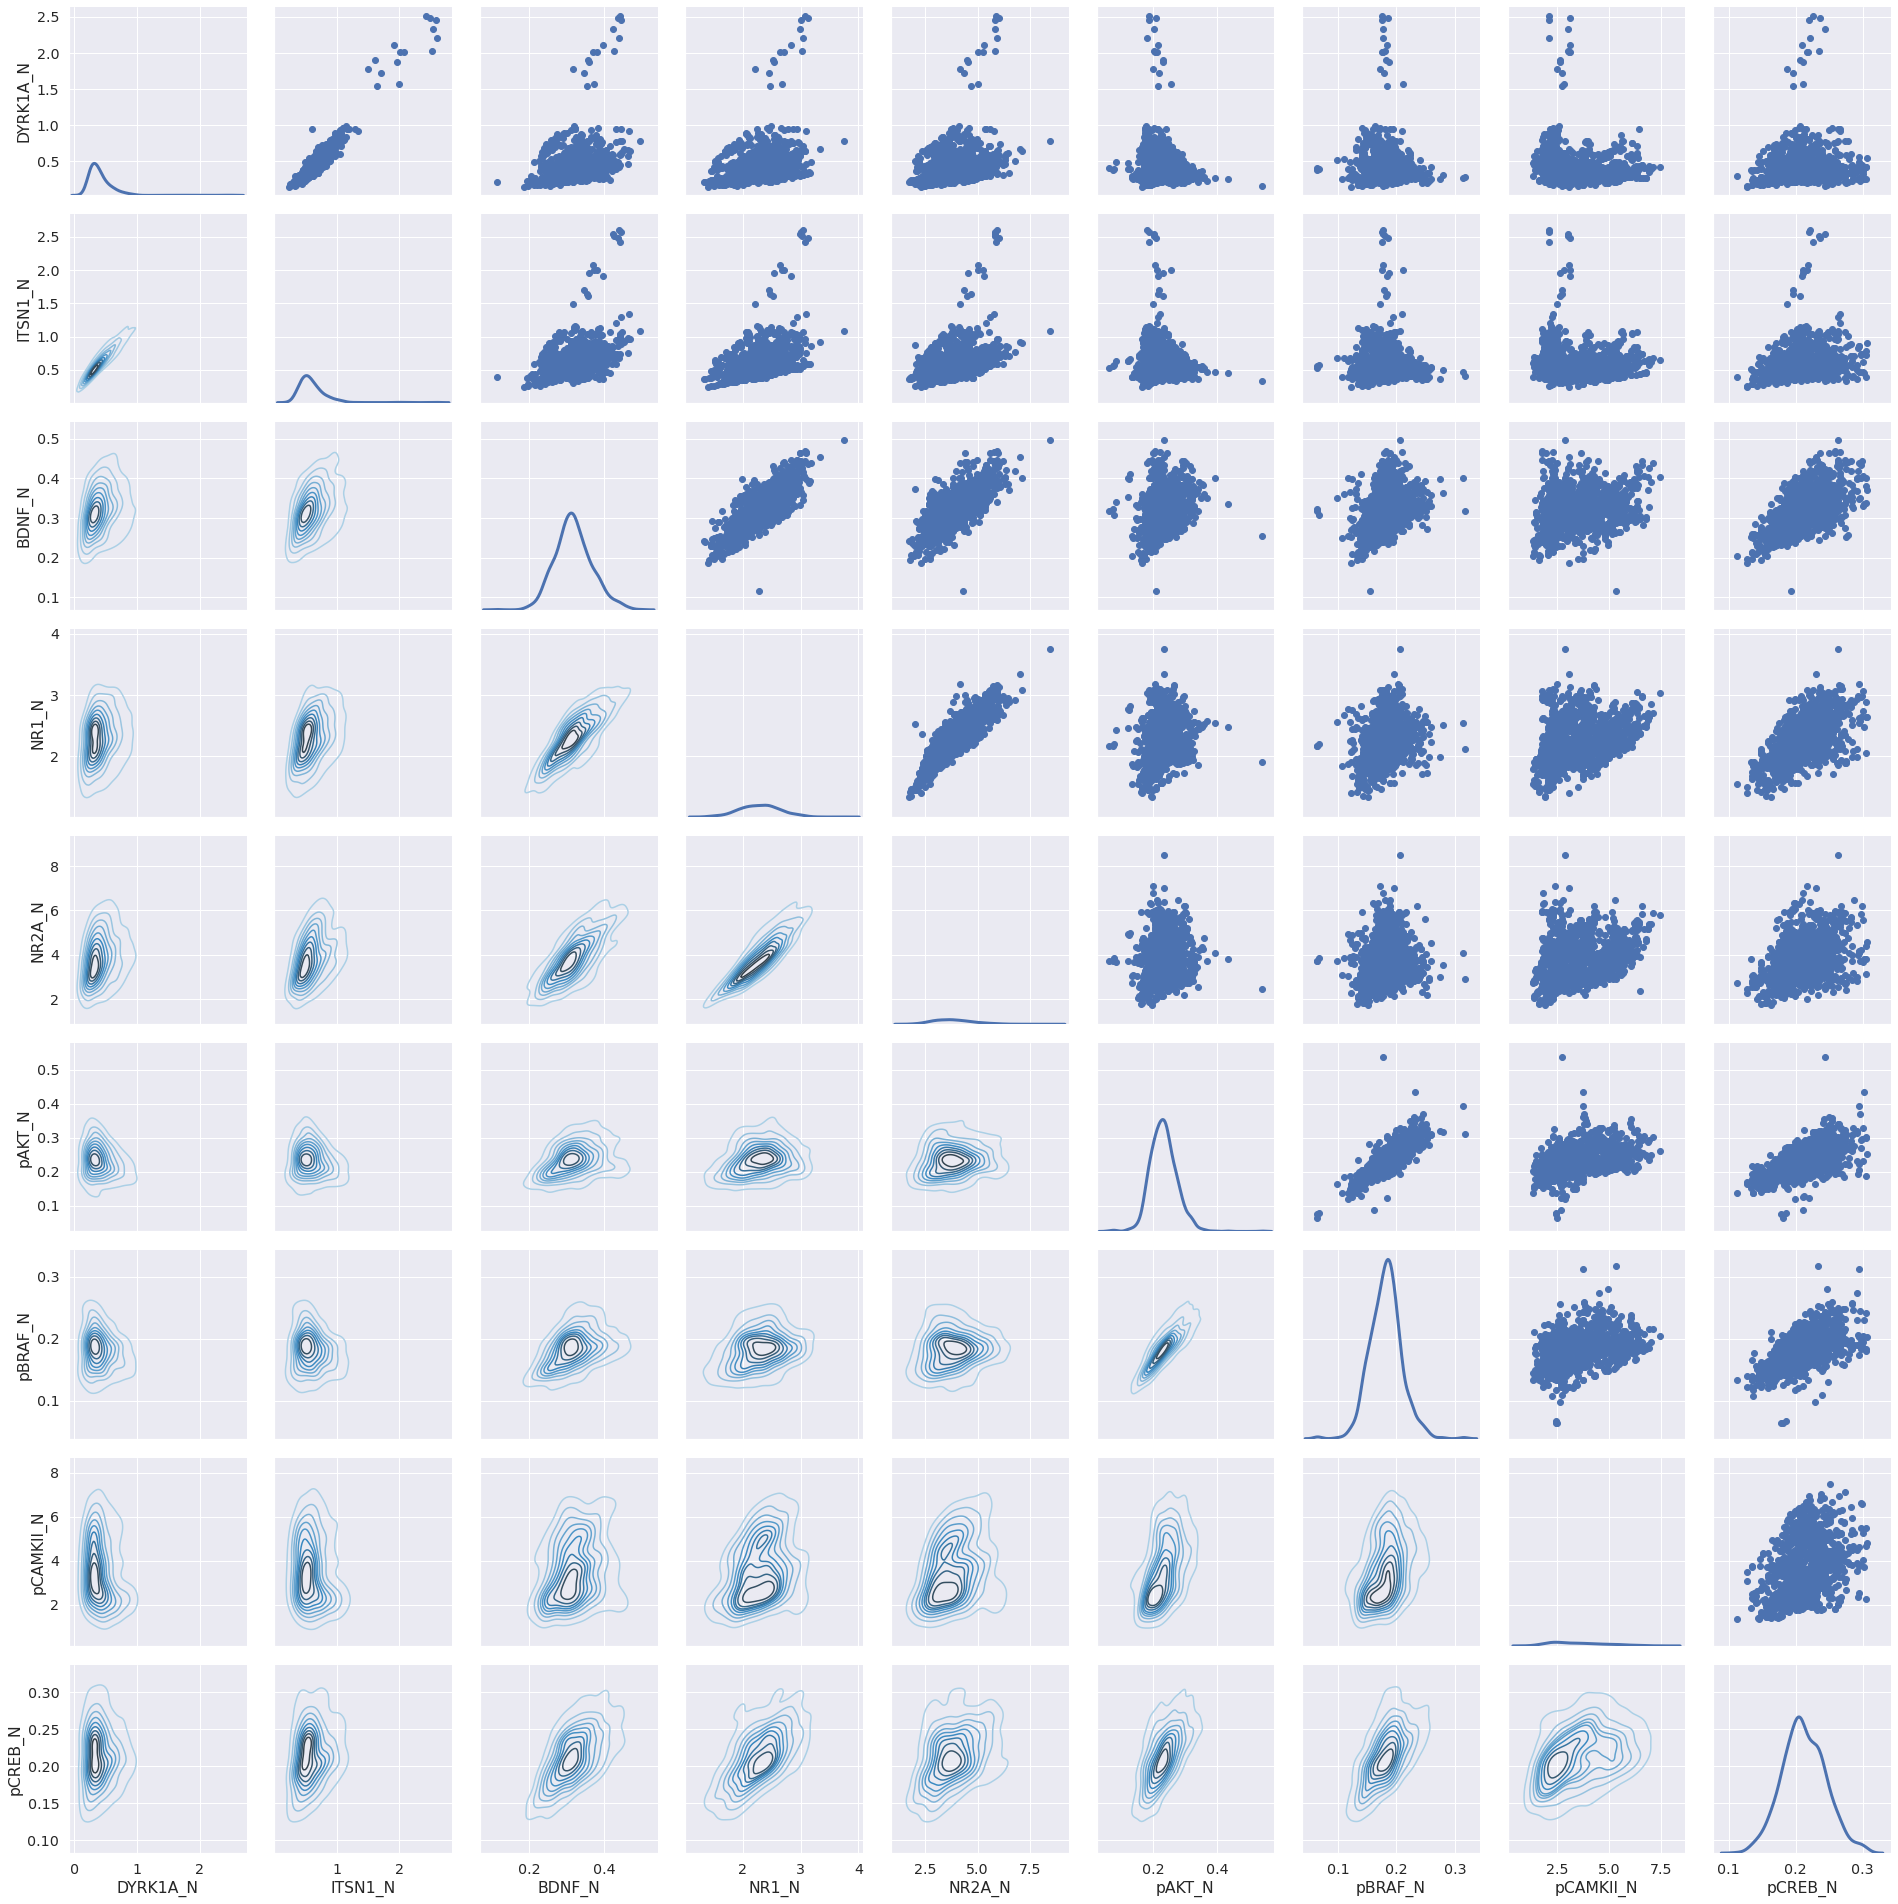

In [ ]:
g = sns.PairGrid(data.iloc[:, 1:10].dropna(), height=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

Посчитайте корреляционную матрицу признаков, соответствующих белкам, и выведите ее с помощью `sns.heatmap`, также выведя значения коэффициентов корреляции в ячейках матрицы.

а) для первых 15 признаков. Сравните корреляционные матрицы, полученные  с использованием трех известных вам коэффициентов корреляции.


б) для всех признаков с использованием коэффициента Спирмена.



**Проверим нормальность данных**

In [18]:
p_vals = []
for column in fav_columns[:15]:
  x = np.array([elem for elem in data[column]])
  p_vals.append(sps.shapiro(x)[1])
print(multipletests(p_vals, method = 'holm')[1])


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


**$⇒$ гипотеза о нормальности не отвергается, можем пользоваться критерием Пирсона**

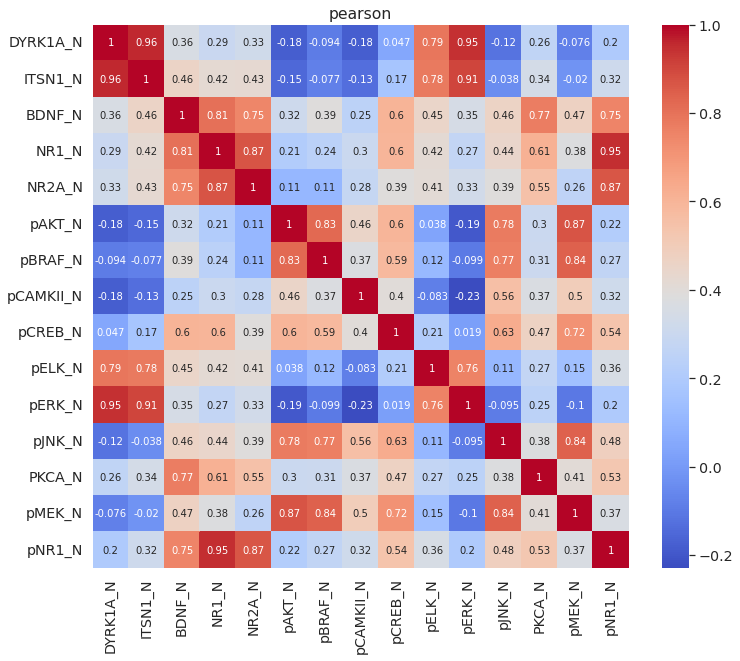

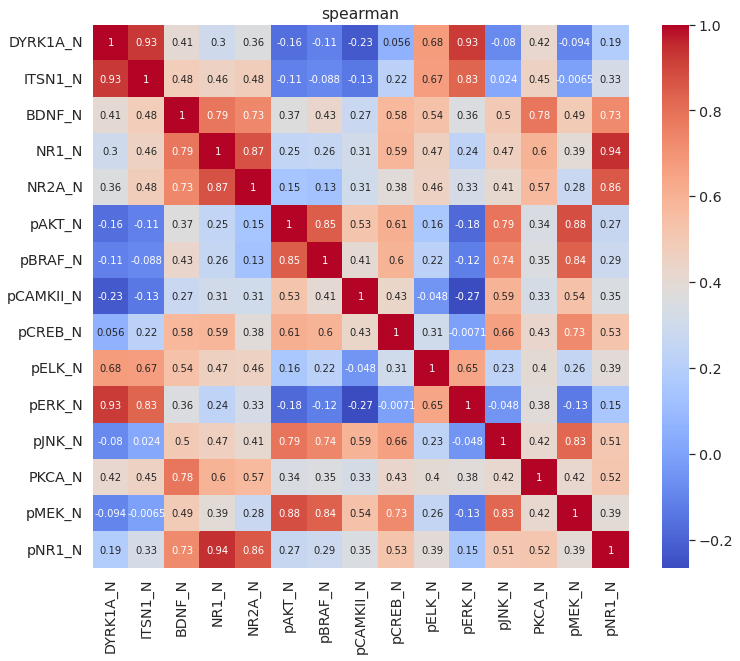

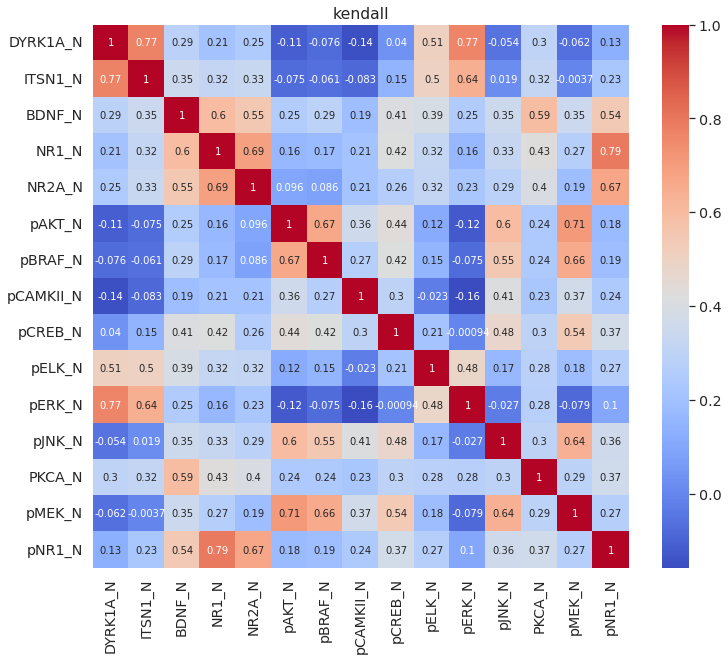

In [ ]:
#a
methods = ['pearson','spearman','kendall']

for method in methods:
  df_15_corr = data[fav_columns[:15]].corr(method = method)
  plt.figure(figsize=(12,10))
  heatmap = sns.heatmap(df_15_corr,annot=True, cmap= 'coolwarm')
  heatmap.set_title(method)

Text(0.5, 1.0, 'spearman')

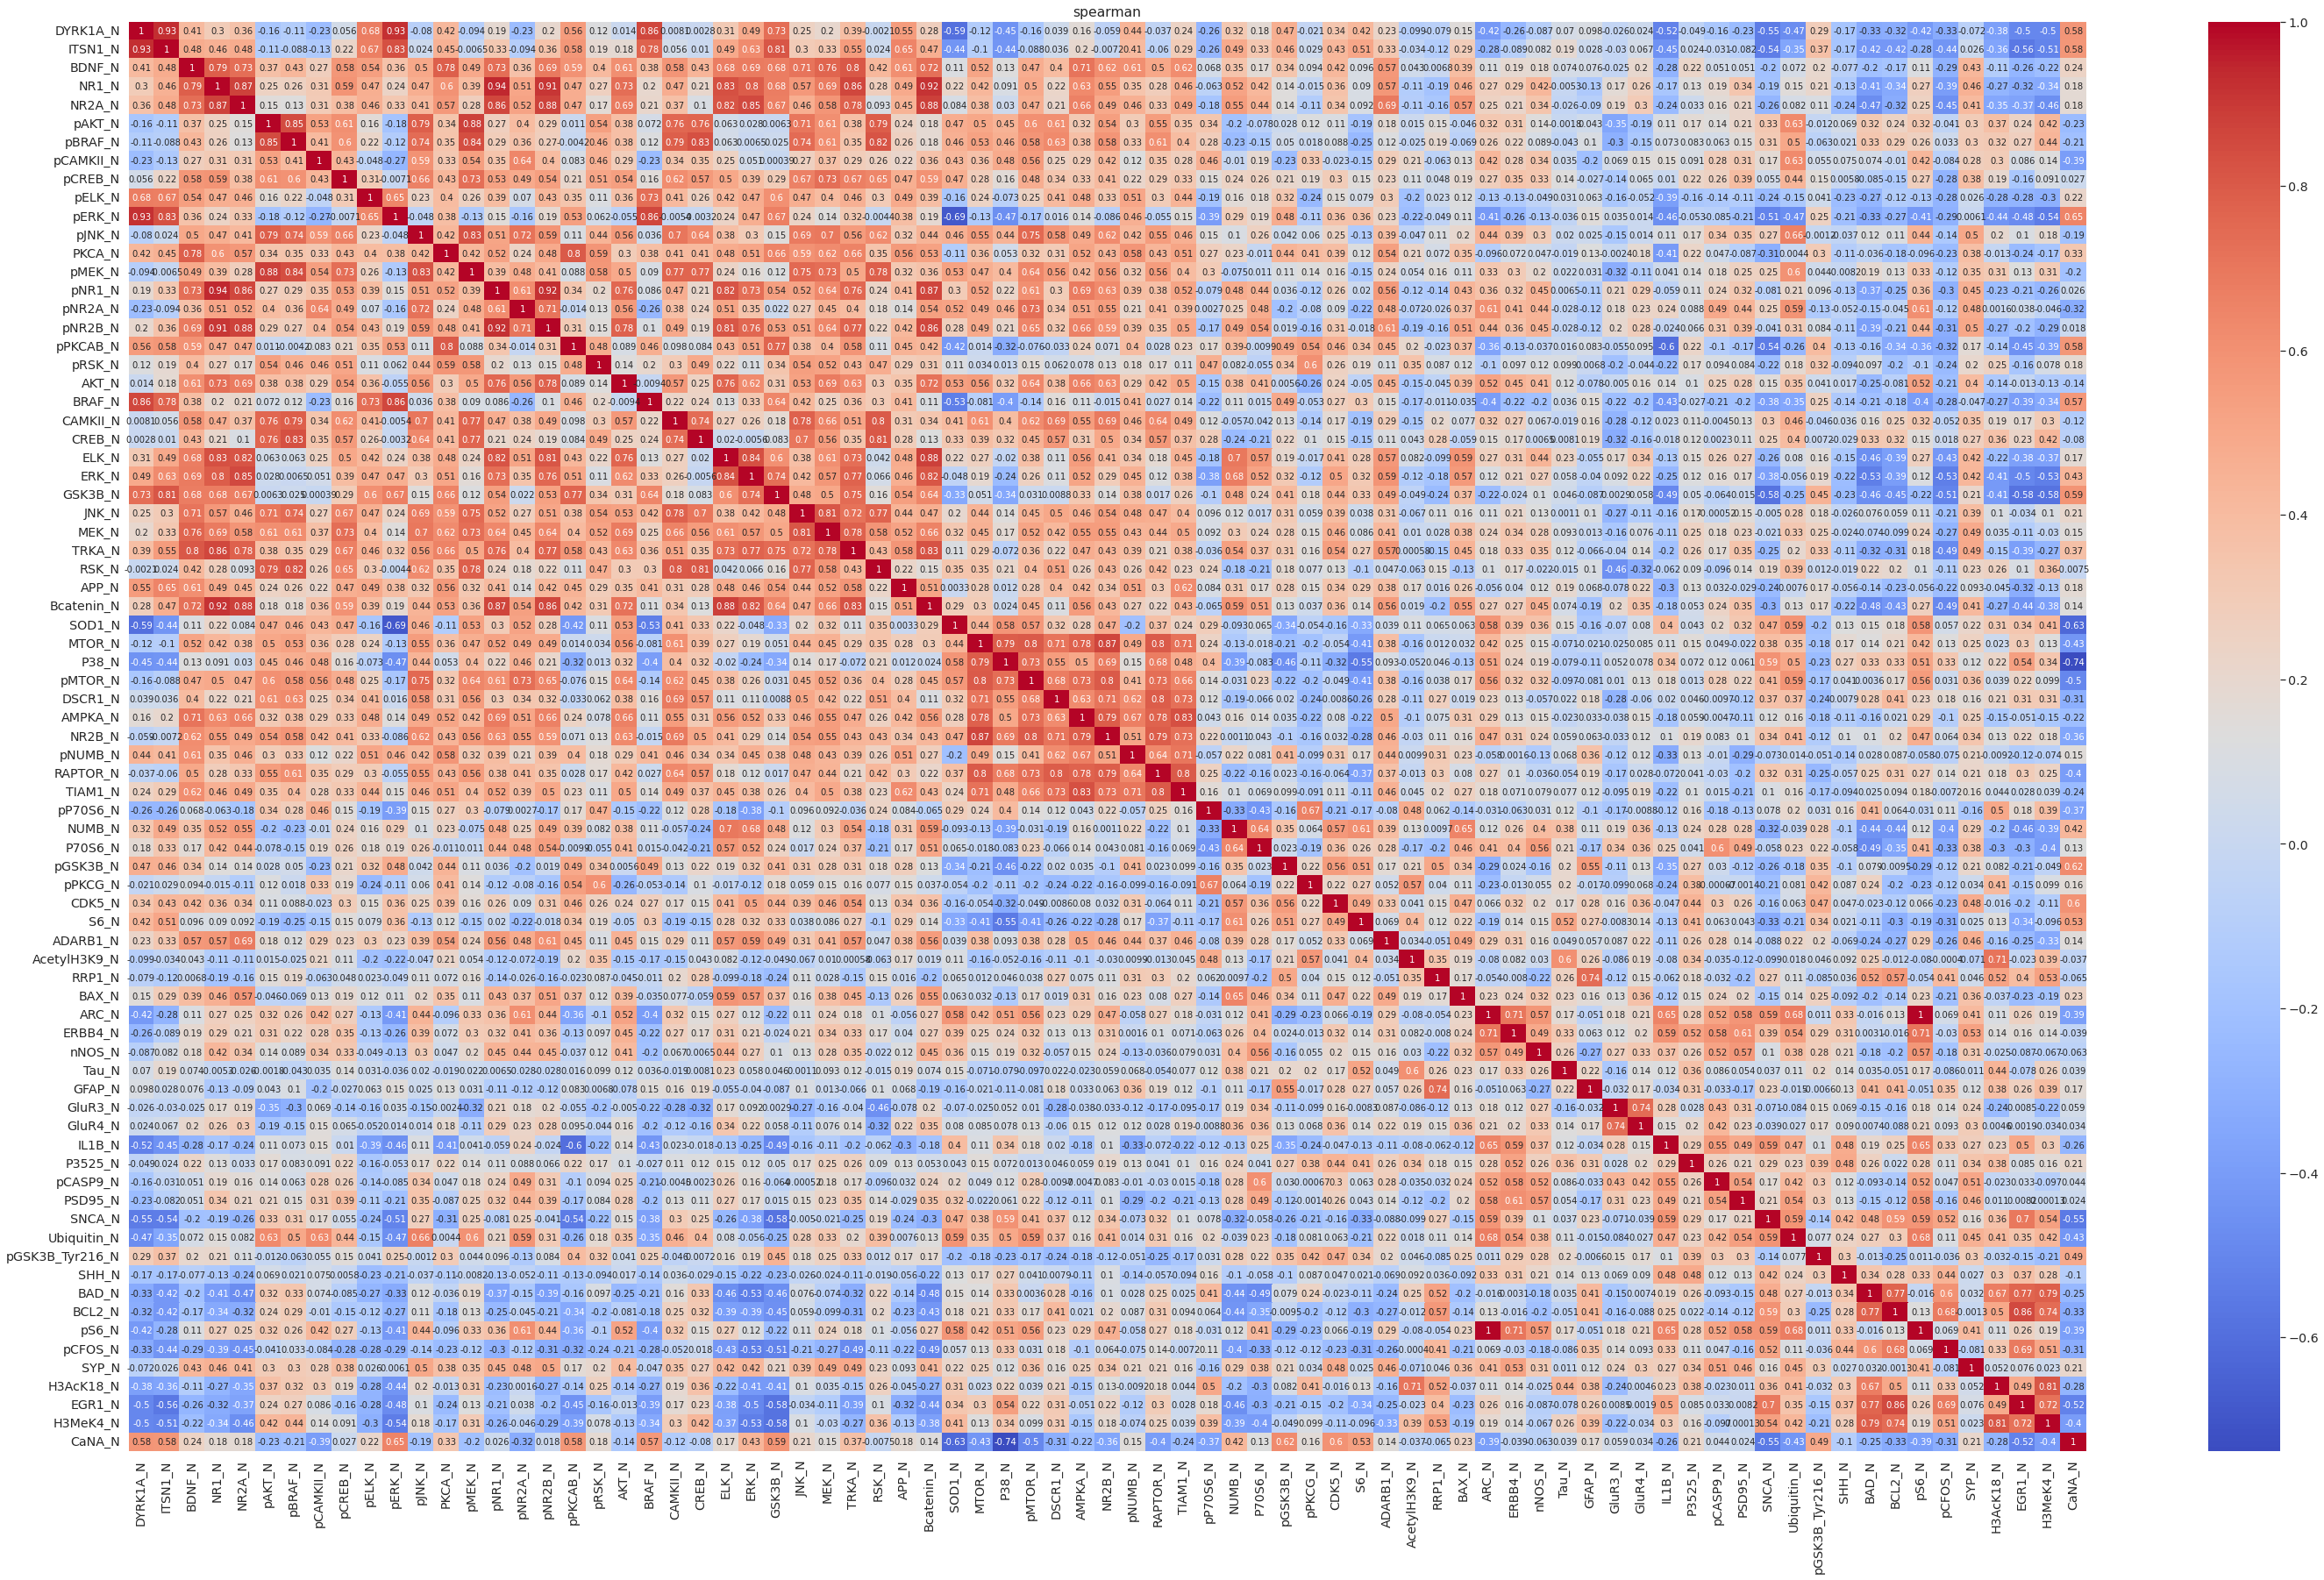

In [ ]:
#b
df_all_corr = data[fav_columns].corr(method = 'spearman')
plt.figure(figsize=(50,30))
heatmap = sns.heatmap(df_all_corr,annot=True, cmap= 'coolwarm')
heatmap.set_title('spearman')

**Вывод**

**а) Коэффициент Кендалла сильнее всего отвергает, соответвующий критерий видимо самый мощный из предложенных. Среди коэфф Пирсона и Спирмана Пирсон дает более "резкие" по модулю значения, то есть он менее устойчив к выбросам чем Спирман. Также заметим, что области корреляций Спирмана и Пирсона совпадают, то есть никаких нелинейных влияний одного гена на другой не наблюдается, зависимости вероятно если и есть, то близки к линейным.**


**b) Большая часть зависимостей уровней экспресии между первыми 42 генами и последними восьмью.**


**Визуализации в принцпипе проще к пониманию чем обычные таблицы. Анализируя тепловую карту можно сразу выделить область в которой стоит провести более тщательный корреляционный анализ**

Далее мы будем исследовать зависимость уровня экспрессии от генотипа. У нас имеется всего два генотипа: обычные мыши и мыши с синдромом Дауна.



Визуализируйте двумерные проекции данных и ядерные оценки плотности с использованием `sns.PairGrid` отдельно по генотипам. Используйте `hue='Genotype'` при вызове `sns.PairGrid`. По параметру `hue`  происходит разделение датасета.

**Опытным путем проверено что для всех генов считается это не меньше 25 минут, сделаем для первых 10 генов.**

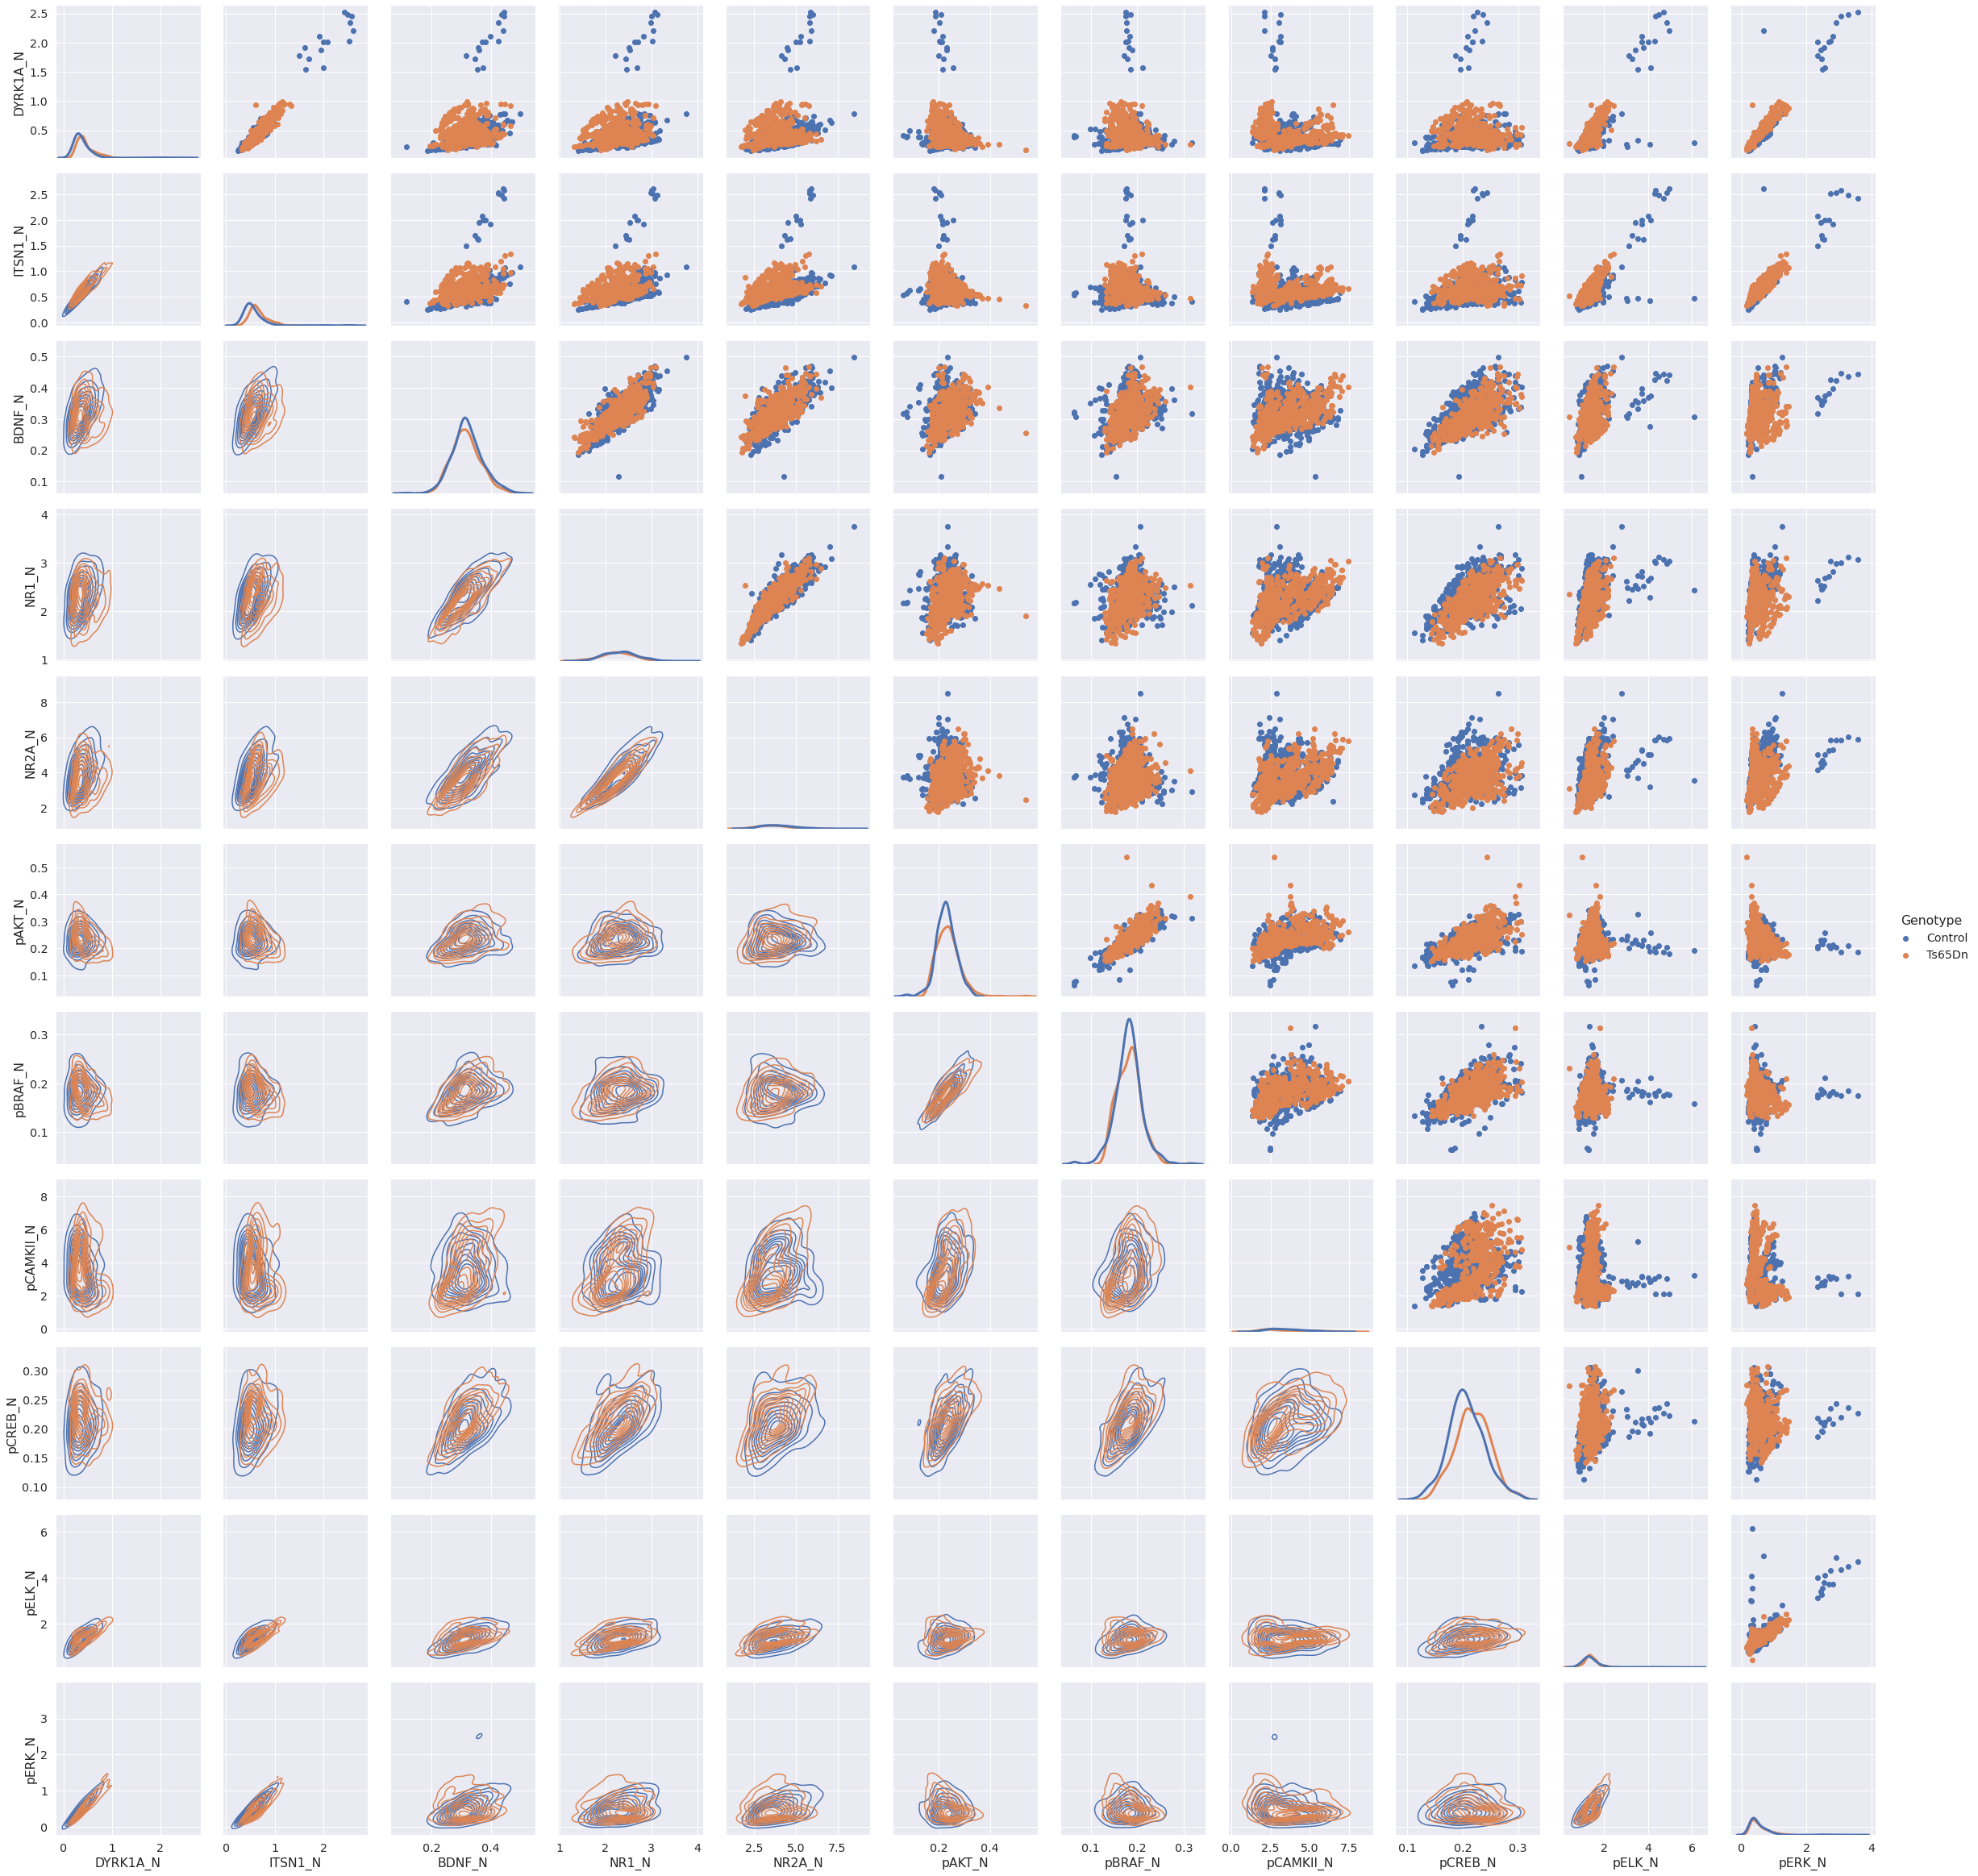

In [35]:
g = sns.PairGrid(data[[*fav_columns[:11], 'Genotype']], height=3, hue = 'Genotype')
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
g.add_legend()

**Заметим, что даже в пределах одного гена есть разница в распределении его экспрессии в зависимости от генотипа(pCREB_N по KDE например). У некоторых генов лучше корреляция в одном генотипе чем в другом: DYRK1A_N и ITSN1_N лучше коррелированы в Ts65Dn чем в контроле(вытянутые полоски из точек)**

**По изменению размаху "кружочков" также видим что меняется разброс значений**

####1. Корреляционный анализ

##### 1.1 Влияние генотипа на экспрессию DYRK1A_N 



С помощью ядерных оценок плотности посмотрите, как отличаются распределения `DYRK1A_N` для разных генотипов.

Избавьтесь от выбросов и `nan`. Разделите все значения на 5 корзин и составьте таблицу сопряженности. Можно воспользоваться функцией `np.histogram2d`. В итоге у вас должна получиться таблица размера $5\times2$.


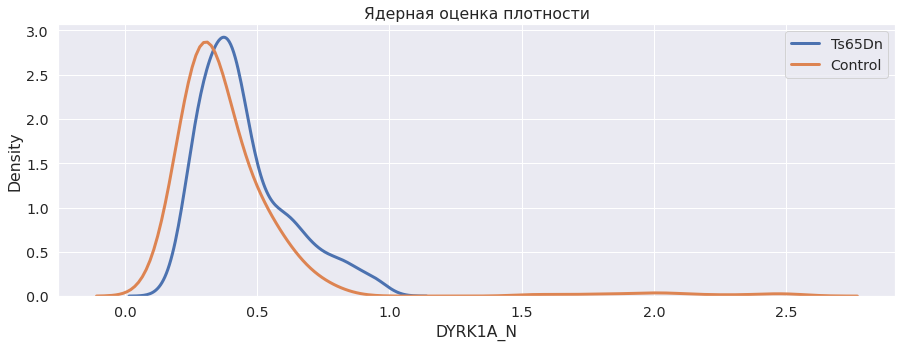

In [6]:
plt.figure(figsize=(15, 5))
plt.title("Ядерная оценка плотности")
sns.kdeplot(data['DYRK1A_N'][data['Genotype'] == 'Ts65Dn'], lw=3, label="Ts65Dn")
sns.kdeplot(data['DYRK1A_N'][data['Genotype'] == 'Control'], lw=3, label="Control")
plt.legend()
plt.show()


In [7]:
data_dyrk = data[['DYRK1A_N','Genotype']].dropna()
data_dyrk = data_dyrk[data_dyrk['DYRK1A_N'] < 1.2] #удаляем выбросы, в общем случае надо удалять для каждой из выборок по отдельности,
#но тут по KDE видно, что выбросы находятся в одинаковых областях для обоих признаков

**Описание  np.histogram2d не поняла, прописала таблицу сопряженности руками**

In [8]:
def podschet(data_dyrk, gene):
    bin1 = (data_dyrk[gene].max() - data_dyrk[gene].min())/5
    bins = [(data_dyrk[gene].min(), data_dyrk[gene].min()+bin1)]
    for i in range(1,5):
        bins.append((data_dyrk[gene].min()+ i*bin1, data_dyrk[gene].min()+(i+1)*bin1))

    data_dyrk_ts = data_dyrk[data_dyrk['Genotype'] == 'Ts65Dn'][gene]
    data_dyrk_cr = data_dyrk[data_dyrk['Genotype'] == 'Control'][gene]
    numbers = [[] for _ in range(5)]
    for i,bin_ in enumerate(bins):
        count_cr, count_ts = 0, 0
        for elem in data_dyrk_cr:
            if bin_[0] <= elem <= bin_[1]:
                count_cr += 1
        for elem in data_dyrk_ts:
            if bin_[0] <= elem <= bin_[1]:
                count_ts += 1
        numbers[i] = [count_cr,count_ts]
    return numbers

In [9]:
def table_gen1(data_dyrk,gene):
    table = pd.DataFrame({k+1:v for k,v in enumerate(podschet(data_dyrk, gene))}) 
    table.index = ['Control', 'Ts65Dn']
    return table
table_gen1(data_dyrk,'DYRK1A_N')

1    2   3   4   5
Control  259  193  88  15   0
Ts65Dn   113  235  90  45  24

Примените критерий хи-квадрат. Следите за условиями применимости критерия.

In [36]:
def table_gen2(data_dyrk,gene):
    table  = table_gen1(data_dyrk,gene)
    table['sum'] = table[[1, 2, 3, 4, 5]].sum(axis=1)
    newline = {k+1:v for k,v in enumerate(table[[1, 2, 3, 4, 5]].sum(axis=0))}
    newline['sum'] = table['sum'].sum(axis = 0)
    table = table.append(newline,ignore_index=True)
    table.index = ['Control', 'Ts65Dn', 'sum_']
    return table
table2 = table_gen2(data_dyrk,'DYRK1A_N')
table2

1    2    3   4   5   sum
Control  259  193   88  15   0   555
Ts65Dn   113  235   90  45  24   507
sum_     372  428  178  60  24  1062

**Проверим заполненность ячеек:**

In [11]:
def check(table):
    exept = 0
    for i in range(3):
        for j in range(1,6):
            if (table['sum'][i]*table[j][2]/table['sum'][2])<5:
                exept += 1
    print(exept/10 < 0.05)
check(table2)

True


**n = 1062 > 40 и ячейки хорошо заполнены => критерий хи - квадрат применим**

In [12]:
def chi(table, alfa = 0.05):
    chi2 = 0
    for i in range(3):
        for j in range(1,6):
            chi2 += (table[j][i] -(table['sum'][i]*table[j][2]/table['sum'][2]))**2/ (table['sum'][i]*table[j][2]/table['sum'][2])
    chi2_alfa = sps.chi2(df=4).ppf(1-alfa)
    print(f'критерий: chi2 > {np.round(chi2_alfa,2)}')
    print(f'chi2 = {np.round(chi2,2)}')

chi(table2)

критерий: chi2 > 9.49
chi2 = 98.48


**Вывод**

**Cледовательно, гипотезу о независимости уровня экспресии гена DYRK1A_N от генотипа надо отвергнуть, выборки соотвествующие контролю и Ts65Dn зависимы**

##### 1.1 Влияние генотипа на экспрессию BDNF_N

Проведите те же исследования для признака  BDNF_N, начиная с ядерных оценок. Сделайте выводы.

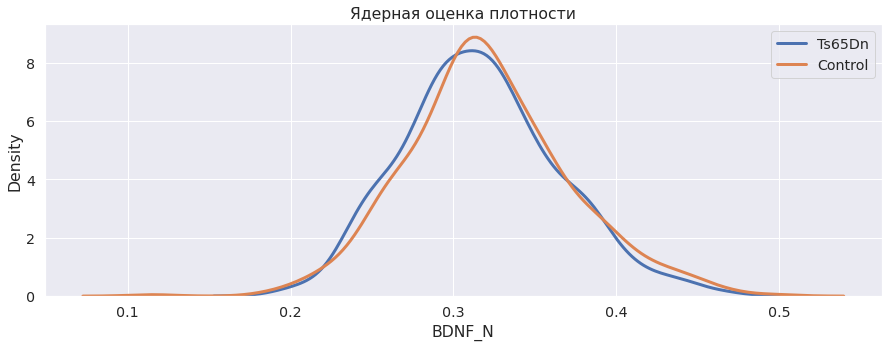

In [13]:
plt.figure(figsize=(15, 5))
plt.title("Ядерная оценка плотности")
sns.kdeplot(data['BDNF_N'][data['Genotype'] == 'Ts65Dn'], lw=3, label="Ts65Dn")
sns.kdeplot(data['BDNF_N'][data['Genotype'] == 'Control'], lw=3, label="Control")
plt.legend()
plt.show()


In [14]:
data_bdnf = data[['BDNF_N','Genotype']].dropna()
data_bdnf = data_bdnf[(data_bdnf['BDNF_N'] < 0.55) & (data_bdnf['BDNF_N'] > 0.15)]
table_bdnf_2 = table_gen2(data_bdnf,'BDNF_N')
table_bdnf_2 

1    2    3    4   5   sum
0  31  213  243   68  14   569
1  36  198  201   64   8   507
2  67  411  444  132  22  1076

In [15]:
check(table_bdnf_2)

True


**n = 1076 > 40 и ячейки хорошо заполнены => критерий хи - квадрат применим**

In [16]:
chi(table_bdnf_2)

критерий: chi2 > 9.49
chi2 = 3.09


**Вывод**

**В данном случае гипотезу о независимости не отвергаем, скорее всего уровень экспресии гена BDNF_N от генотипа не зависит**


**С биологической точки зрения, при трисомии логично предпологать, что уровни экспрессии изменятся, при синдроме Дауна нарушена экспрессия множества генов, причем эти нарушения наблюдаются по всему геному. Хотя казалось бы следует ожидать измений только на "сломанной" паре хромосом.**